In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('Template1.xlsx',sheet_name = None)

In [3]:
xls = pd.ExcelFile('Template1.xlsx')
xls.sheet_names 
flow = data.get('Flow vs. Group')
flow.head()

,SN,Flow,Step Name,WS,Area,Step SEQ NO,STEP STATUS,REC TO SCHED?,EXPORT TO CRINV?
0,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU31_DHF100,F11 WET PROCESS,100,ACTIVE,Y,Y
1,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU3_DHF100,F11 WET PROCESS,100,ACTIVE,Y,N
2,1,100S PC,5450-21 STI OXIDE BACKSIDE WET ETCH,11-3DNS_SU31_DHF_4,F11 WET PROCESS,100,ACTIVE,Y,N
3,2,100S PC,5200-53 GATE NITRIDE DEP 2 CMP,11-3EBRA_FRXX_BUFF,F11 CMP,200,ACTIVE,Y,N
4,2,100S PC,5200-53 GATE NITRIDE DEP 2 CMP,11-3EBRA_FRXS_BUFF,F11 CMP,200,ACTIVE,Y,Y


In [4]:
process = input('Please Enter the product: ')

Please Enter the product: 120S PC


In [5]:
flow = flow[flow['Flow'] == process]

In [6]:
Qty = data.get('WS vs. Tool ID') 
WS_NAME = Qty['WS']
WS_NAME1 = []
for i in WS_NAME:
    #i.replace('\\xa0', '')
    WS_NAME1.append(i.replace('\xa0', ''))
print(len(WS_NAME1))

3780


In [7]:
G_WS = data.get('Group vs. WS')
G_WS1 = G_WS.set_index(['Capacity Group'],inplace = False)
WS_Group = []
for i in WS_NAME1:
    if i in G_WS1['WS'].tolist():
        group = G_WS1[G_WS1['WS'] ==  i].index.tolist()
    else:
        group = ['0']
    #group = G_WS[G_WS['WS'] ==  i].iat[0,0]
    WS_Group.extend(group)
    #print(group)
Qty['WS Group'] = WS_Group
Qty.head()

,MiCAP ID,WS,Tool ID,Location,WS Group
0,1195118,11-3HIKE_Q2LV_UDPLY,KISDB7VA00,7,11-DIF_UDPLY
1,1195119,11-3HIKE_Q2LV_BSIGE,KISDB7V300,7,11-DIF_BSIGEPLY
2,1195249,11-3TEL_SDRM_EBK,TTSDBC0130,C,11-DRY_SDRM_EBK
3,1195249,11-3TEL_SDRM_EBK,TTSDBC0120,C,11-DRY_SDRM_EBK
4,1195249,11-3TEL_SDRM_EBK,TTSDBC0110,C,11-DRY_SDRM_EBK


In [8]:
step = []
for i in flow['WS']:
    if i in G_WS1['WS'].tolist():
        s = G_WS1[G_WS1['WS'] ==  i].index.tolist()
    else:
        s = ['0']
    step.extend(s)
#print(step.values.tolist())
#print(step)

In [9]:
G_WS1[G_WS1['WS'] == '11-3ASML_NXT1980_193'].index 

Index(['11-PH_193NM_WET'], dtype='object', name='Capacity Group')

In [10]:
flow = flow.drop(['Area','Step SEQ NO','STEP STATUS','REC TO SCHED?','EXPORT TO CRINV?'], axis = 1)
flow['WS Group'] = step
flow.head()

,SN,Flow,Step Name,WS,WS Group
3827,1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3TEL_NS3S_SCRB_DS,11-WET_SCRUB_DS
3828,1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3DNS_SS33_SCRB_DS,11-WET_SCRUB_DS
3829,1,120S PC,5420-88 PASS NITRIDE DRY ETCH SCRUB,11-3DNS_SS32_SCRB_DS,11-WET_SCRUB_DS
3830,2,120S PC,5420-5C SPACER OXIDE DRY STRIP 2 SCRUB,11-3TEL_NS3S_SCRB_DS,11-WET_SCRUB_DS
3831,2,120S PC,5420-5C SPACER OXIDE DRY STRIP 2 SCRUB,11-3DNS_SS32_SCRB_DS,11-WET_SCRUB_DS


In [11]:
wafer = input('Please enter the quantity of wafers:')
wafer_m = []
for i in step:
    if i in WS_Group:
        w = round(int(wafer)/Qty.groupby(['WS Group']).size()[i],2)
        wafer_m.append(w)
    else:
        wafer_m.append(0)
    #print(i)
#print ('Number of wafers in each machine:',wafer_m)

Please enter the quantity of wafers:7000


In [12]:
add_WS = input('Please enter the Workstation Group to add tool : ') #增加機台的 Workstation
included_WS = [i for i,x in enumerate(step) if x==add_WS] #重複項索引值
for i in included_WS:
    if i == 0 or i == flow.shape[0]-1:
        included_WS.remove(i)
    else:
        None
change_WS = []
for i in included_WS:
    _WS_ = step[i-1:i+2] #提取索引
    change_WS.append(_WS_)
#print(change_WS)
#print(step[77])
change_WS_position = []
for i in included_WS:
    _WS_ = [i-1,i,i+1] #提取索引
    change_WS_position.extend(_WS_)
#print(change_WS_position)

Please enter the Workstation Group to add tool : 11-PH_193NM_WET


In [13]:
col = ['3','4','7','8','9','C','D','E']
#print(wafer_in_each_machine)
wafer_in_each_machine = pd.DataFrame(columns = col)
machine_num = pd.DataFrame(columns = col)
for i in change_WS:
    for j in range(3):
        f1 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == '3')].shape[0]
        f2 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == '4')].shape[0]
        f3 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == '7')].shape[0]
        f4 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == '8')].shape[0]
        f5 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == '9')].shape[0]
        f6 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == 'C')].shape[0]
        f7 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == 'D')].shape[0]
        f8 = Qty[(Qty['WS Group'] == i[j]) & (Qty['Location'] == 'E')].shape[0]
        machine = np.array([f1,f2,f3,f4,f5,f6,f7,f8])
        machine_D = pd.DataFrame([machine],columns = col)
        machine_num = machine_num.append(machine_D)
        #print(machine)
        for k in range(8):
            if i[j] in WS_Group:
                num = wafer_m[step.index(i[j])]*machine[k]
            else:
                num = 0
            machine[k] = num
        machine = pd.DataFrame([machine],columns = col)
        #print(machine)
        wafer_in_each_machine = wafer_in_each_machine.append(machine)
wafer_in_each_machine.head()
#print(wafer_in_each_machine.shape[0])        

,3,4,7,8,9,C,D,E
0,1531,0,2843,0,218,2187,218,0
0,0,0,5055,0,0,1944,0,0
0,1750,0,1750,0,0,3500,0,0
0,1531,0,2843,0,218,2187,218,0
0,0,0,5055,0,0,1944,0,0


In [14]:
df = pd.DataFrame()
for i in range(8):
    for j in range(len(included_WS*3)):
        if step[change_WS_position[j]] == '11-PH_193NM_WET':
            machine_num.values[j,i] =  machine_num.values[j,i]+1
            wafer_in_each_machine.values[j] = machine_num.values[j]*(int(wafer)/(sum(machine_num.values[j])))
            machine_num.values[j,i] =  machine_num.values[j,i]-1
        else:
            None
    df = pd.concat([df,wafer_in_each_machine],axis = 0)
df.head()

,3,4,7,8,9,C,D,E
0,1531,0,2843,0,218,2187,218,0
0,368.421,0,4789.47,0,0,1842.11,0,0
0,1750,0,1750,0,0,3500,0,0
0,1531,0,2843,0,218,2187,218,0
0,368.421,0,4789.47,0,0,1842.11,0,0


In [15]:
data = np.vsplit(df.values, len(change_WS)*len(col))

def weight(distance,carry):
    total_carry = []
    for i in range(2):
        carry_weight = np.multiply(carry[i],distance)
        total_carry_step = np.sum(carry_weight)-np.trace(carry_weight) 
        total_carry.append(total_carry_step)
        #print(carry_weight)
        #print(total_carry_step)
    return sum(total_carry)
weight_distance = np.array([[0,1,1,2,3,1,2,3],[1,0,2,3,4,2,3,4],[1,2,0,1,2,1,2,3],[2,3,1,0,1,2,3,4]
                           ,[3,4,2,1,0,3,4,5],[1,2,1,2,3,0,1,2],[2,3,2,3,4,1,0,1],[3,4,3,4,5,2,1,0]])
Carriage = []
for l in range(len(change_WS)*len(col)):
    a = range(len(col))
    c_m = []
    for k in range(2):
        for j in a:
            for i in a:
                c_n = max(data[l][k,j]-data[l][k+1,j],0)*data[l][k+1,a]//(int(wafer)-data[l][k+1,j]+1) #避免分母為零
            c_m.append(c_n)      
    c_step_m = np.array(c_m)
    #print(c_step_m)
    #print(c_step_m.shape)
    c_carry = np.vsplit(c_step_m, 2)
    for i in range(2):
        for j in range(8):
            c_carry[i][j][j] = min(data[l][i,j],data[l][i+1,j])
            c_carry = np.array(c_carry)
    Carriage.append(weight(distance = weight_distance,carry = c_carry))
Carriage = np.array([Carriage]).reshape(8,len(included_WS)).T
Carriage = pd.DataFrame(Carriage,columns = col)
#Carriage.head(len(change_WS)+1)

In [16]:
excel = pd.read_excel('template_result for 120S PC 7K.xlsx',sheet_name = None)
xls1 = pd.ExcelFile('template_result for 120S PC 7K.xlsx')
xls1.sheet_names
compare = excel.get('Sheet1')
compare = compare['Step carriage'].tolist()
b = [i-1 for i in included_WS]
origin = included_WS+b
origin = sorted(origin)
origin_carriage = []
for i in range(0,len(origin)-1,2):
    origin_carriage.append(compare[origin[i]] + compare[origin[i+1]])
origin_carriage = pd.DataFrame(origin_carriage)
Carriage['Original Carriage'] = origin_carriage
Carriage.loc['Total Carriage'] = Carriage.apply(lambda x: x.sum())
Carriage.head(len(change_WS)+1)

,3,4,7,8,9,C,D,E,Original Carriage
0,5421.0,6479.0,6147.0,6526.0,6529.0,5435.0,6055.0,6904.0,5943.0
1,6913.0,7802.0,7638.0,8033.0,8034.0,7295.0,7691.0,8538.0,7536.0
2,7159.0,8002.0,7896.0,8343.0,8866.0,7896.0,8380.0,8903.0,7895.0
3,9259.0,9995.0,9997.0,10520.0,11045.0,9997.0,10520.0,11045.0,9996.0
4,6913.0,7802.0,7638.0,8033.0,8034.0,7295.0,7691.0,8538.0,7536.0
5,7159.0,8002.0,7896.0,8343.0,8866.0,7896.0,8380.0,8903.0,7895.0
6,7897.0,8633.0,8266.0,8796.0,9327.0,7898.0,8428.0,8959.0,8163.0
7,17557.0,18339.0,17767.0,17061.0,17948.0,17352.0,17344.0,17163.0,17643.0
8,7171.0,8258.0,7897.0,8366.0,8368.0,7185.0,7681.0,8529.0,7692.0
9,6913.0,7802.0,7638.0,8033.0,8034.0,7295.0,7691.0,8538.0,7536.0


In [17]:
import matplotlib.pyplot as plt

In [18]:
Carriage.iloc[-1,0:8]

3    187827.0
4    202654.0
7    196065.0
8    197589.0
9    204130.0
C    190707.0
D    194406.0
E    202140.0
Name: Total Carriage, dtype: float64

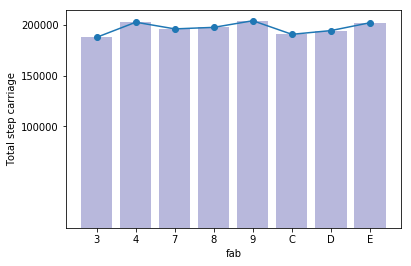

In [19]:
plt.figure()
plt.bar(['3','4','7','8','9','C','D','E'],Carriage.iloc[-1,0:8],color = '#b8b8dc')
plt.yticks(np.arange(100000, 210000, 50000))
plt.xlabel('fab')
plt.ylabel('Total step carriage')
plt.plot(['3','4','7','8','9','C','D','E'],Carriage.iloc[-1,0:8],'-o')